# 제품 이상여부 판별 프로젝트


## 1. 데이터 불러오기


### 필수 라이브러리


In [131]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)

from sklearn.ensemble import RandomForestClassifier
# !pip install lightgbm -q
import lightgbm as lgb

### 데이터 읽어오기


In [145]:
ROOT_DIR = "data"

# data
train = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))
test = pd.read_csv(os.path.join(ROOT_DIR, "test.csv"))

display(train.head())
display(test.head())

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,CURE END POSITION X Judge Value_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,NaN,NaN,...,7,NaN,NaN,127,NaN,NaN,1,NaN,NaN,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,NaN,NaN,...,185,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,NaN,NaN,...,10,NaN,NaN,73,NaN,NaN,1,NaN,NaN,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,NaN,NaN,...,268,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,NaN,NaN,...,121,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal


,Set ID,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,0001be084fbc4aaa9d921f39e595961b,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3J1XF767-1,1,OK,1000.0,NaN,...,195,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN
1,0005bbd180064abd99e63f9ed3e1ac80,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4B1XD472-2,1,OK,1000.0,NaN,...,14,NaN,NaN,256,NaN,NaN,1,NaN,NaN,NaN
2,000948934c4140d883d670adcb609584,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3H1XE355-1,1,OK,240.0,NaN,...,98,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN
3,000a6bfd02874c6296dc7b2e9c5678a7,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3L1XA128-1,1,OK,1000.0,NaN,...,14,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN
4,0018e78ce91343678716e2ea27a51c95,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4A1XA639-1,1,OK,240.0,NaN,...,1,NaN,NaN,215,NaN,NaN,1,NaN,NaN,NaN


### 데이터 전처리


In [123]:
def feature_preprocessing(
    train: pd.DataFrame,
    test: pd.DataFrame,
#     features: list,
    ):
    
    x_train = train.copy()
    x_test = test.copy()
    
    
    # 결측치 처리
    drop_cols = [col
                     for col in train.columns
                     if (train[col].notnull().sum()==0)]
    drop_cols.extend([
        'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam', 
        'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1',
        'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave',
        'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave', 
        'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2',
        ])
    x_train = x_train.drop(columns=drop_cols)
    drop_cols.extend(['Set ID'])
    x_test = x_test.drop(columns=drop_cols)
    
    
    # 이상한 값 처리
    # + 이상치 처리 추가
    outlier_cols = [
        'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
        'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
        'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2']
    
    def ok_value_handling(df, column):
        if df[column].value_counts().index[0] == 'OK':
            mod = df[column].value_counts().index[1]
        else:
            mod = df[column].value_counts().index[0]

        return df[column].fillna(mod).replace('OK', mod).astype(float)
         
    for col in outlier_cols:
        x_train[col] = ok_value_handling(x_train, col)
        x_test[col] = ok_value_handling(x_test, col)
        

    # 카테고리 컬럼 설정 - 값 한개인 컬럼 삭제 + 레이블 인코딩
    drop_categorical_cols = [col
                             for col in x_train.select_dtypes(include='O').columns
                             if x_train[col].nunique() == 1]
    x_train = x_train.drop(columns=drop_categorical_cols)
    x_test = x_test.drop(columns=drop_categorical_cols)

    categorical_cols = x_train.select_dtypes(include='O').columns
    
    for col in categorical_cols:
        le = LabelEncoder()
        le.fit(list(x_train[col].values) + list(x_test[col].values))
        
        x_train[col] = le.transform(list(x_train[col].values))
        x_test[col] = le.transform(list(x_test[col].values))


    return x_train, x_test, categorical_cols[:-1]

## 3. 모델 학습


### 모델 정의


In [119]:
SEED = 42

lgb_params = {
    'objective': 'binary', # 이진 분류
    'boosting_type': 'gbdt', # gradient boosting tree
    'metric': 'f1', # 평가 지표 설정
    'n_estimators': 10000, # 트리 최대 개수
    'seed': SEED, # Fix Seed 정의 code
    'verbose': -1,
    'n_jobs': -1,    
}


model = lgb.LGBMClassifier(**lgb_params)

### 모델 학습


In [129]:
x_tr, x_te, categorical_cols = feature_preprocessing(train, test)
y_tr = x_tr.pop('target')

X_train, X_val, y_train, y_val = train_test_split(x_tr, y_tr,
                                                    test_size=0.2, 
                                                    random_state=SEED)

dtrain = lgb.Dataset(X_train, label=y_train)
dvalid = lgb.Dataset(X_val, label=y_val)

fi = pd.DataFrame()
fi['feature'] = x_tr.columns

clf = lgb.train(
    lgb_params,
    dtrain,
    valid_sets=[dvalid],
)

fi['importance'] = clf.feature_importance()

164


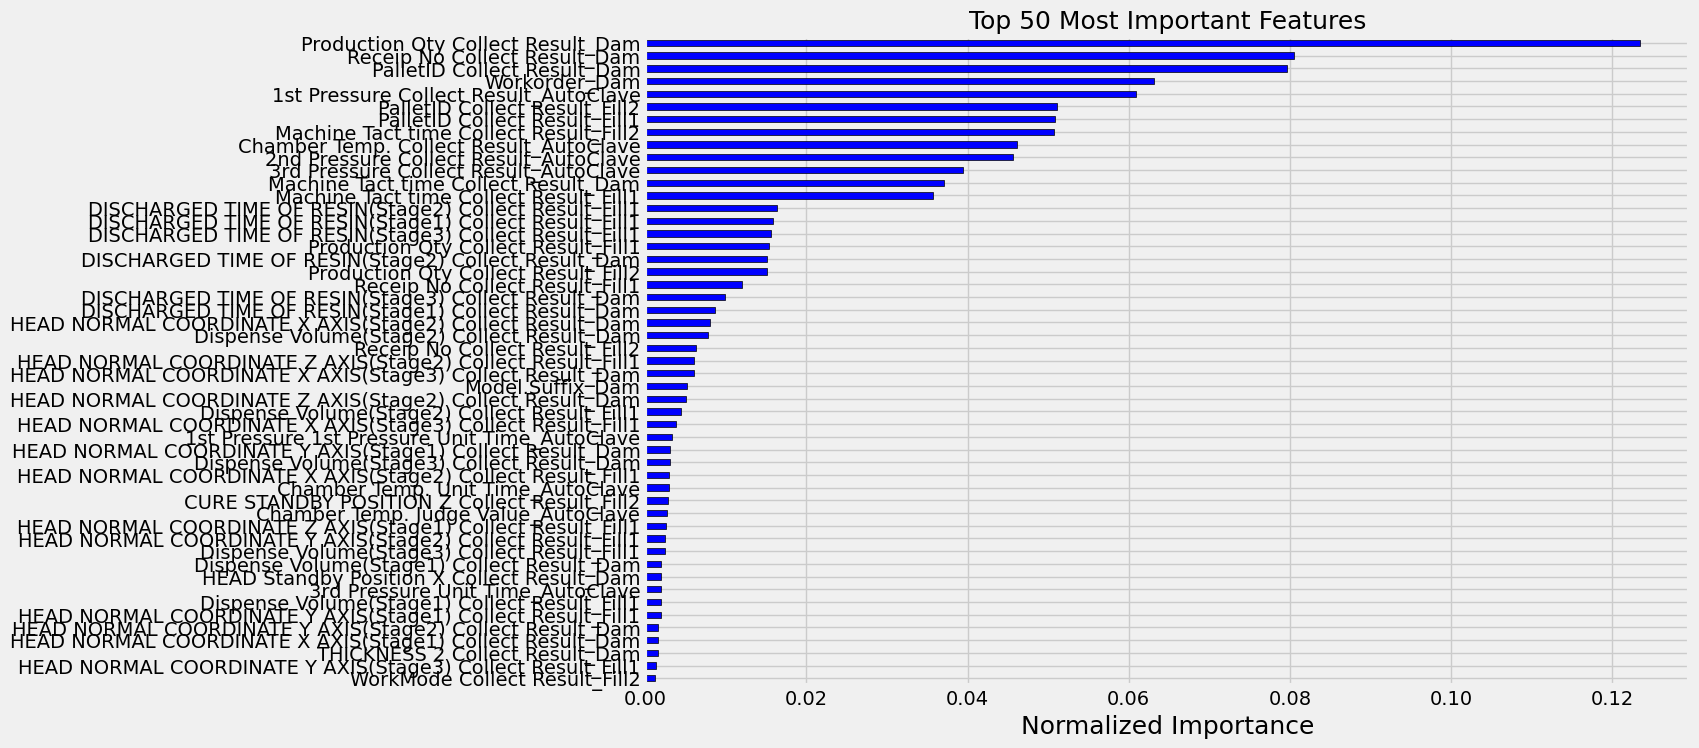

In [133]:
def plot_feature_importances(df, n=50, color='blue', figsize=(12,8)):
    # 피처 중요도 순으로 내림차순 정렬
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # 피처 중요도 정규화 및 누적 중요도 계산
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    plt.style.use('fivethirtyeight')
    # 피처 중요도 순으로 n개까지 바플롯으로 그리기
    df.loc[:n, :].plot.barh(y='importance_normalized', 
                            x='feature', color=color, 
                            edgecolor='k', figsize=figsize,
                            legend=False)

    plt.xlabel('Normalized Importance', size=18); plt.ylabel(''); 
    plt.title(f'Top {n} Most Important Features', size=18)
    plt.gca().invert_yaxis()
    
    return df
print(len(x_tr.columns))
fi = plot_feature_importances(fi)

In [144]:
lgb.plot_tree(model, tree_index=50, figsize=(100,100))

NotFittedError: No booster found. Need to call fit beforehand.

## 4. 제출하기


### 테스트 데이터 예측


테스트 데이터 불러오기


In [ ]:
test_data = pd.read_csv(os.path.join(ROOT_DIR, "test.csv"))

In [ ]:
df_test_x = test_data[features]

for col in df_test_x.columns:
    try:
        df_test_x.loc[:, col] = df_test_x[col].astype(int)
    except:
        continue

In [ ]:
test_pred = model.predict(df_test_x)
test_pred

### 제출 파일 작성


In [ ]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["target"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**
